## What is Object-Oriented Programming (OOP)?

**Object-Oriented Programming (OOP)** is a programming paradigm that organizes code into "objects"—each bundling **data** and **functions** that operate on that data. Objects are created from **classes**, which define the structure (attributes) and behaviors (methods) of the objects.

Key OOP Concepts:
- **Classes:** Templates for creating objects. Define attributes and methods.
- **Objects:** Instances of classes. Each contains its own data.
- **Attributes:** Variables that hold data (e.g., `name`, `sequence`).
- **Methods:** Functions that perform actions on the object’s data (e.g., `length()`, `reverse_complement()`).
- **Inheritance:** A way to extend classes; a subclass inherits attributes and methods from its parent.
- **Encapsulation:** Grouping related data and methods into a single unit (the class).

This design helps create more modular, understandable, and maintainable code—especially useful in scientific coding where similar tasks are repeated.

## Creating Classes in Python

To create a class in Python, you define it using the `class` keyword. Inside, you define attributes (data) and methods (functions) that operate on the object's data.

### Example: A Simple DNASequence Class

We will create a `DNASequence` class that:
- Stores a DNA sequence and its name.
- Has a method `length()` to return the sequence length.
- Has a method `gc_content()` to calculate the percentage of guanine (G) and cytosine (C).
- Has a method `reverse_complement()` to generate the reverse complement, following the base-pairing rules:
  - A ↔ T, C ↔ G

This example illustrates how to encapsulate both data (e.g., the actual sequence string) and behaviors (e.g., computing the reverse complement) within one class.


In [1]:
# Define a class for DNA sequences
class DNASequence:
    def __init__(self, name, sequence):
        """Initialize a DNASequence with a name and sequence string."""
        self.name = name              # save the name (e.g., gene or sequence ID)
        self.sequence = sequence      # save the DNA sequence string (e.g., "ATGC...")
    
    def length(self):
        """Return the length of the DNA sequence."""
        return len(self.sequence)
    
    def gc_content(self):
        """Calculate GC content (%) of the sequence."""
        # Count G's and C's in the sequence (case-insensitive)
        seq_upper = self.sequence.upper()
        g_count = seq_upper.count('G')
        c_count = seq_upper.count('C')
        gc_percent = (g_count + c_count) / len(seq_upper) * 100
        return gc_percent
    
    def reverse_complement(self):
        """Return the reverse complement of the DNA sequence."""
        # Define the mapping of each nucleotide to its complement
        comp_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
        # Build the complement of the reversed sequence ### 
        rev_comp = ''.join(comp_map.get(base.upper(), 'N')  # 'N' for any unknown base 
                            for base in reversed(self.sequence))
        return rev_comp


We've defined three methods in addition to __init__:

- .length() – returns the length of the sequence.
- .gc_content() – computes the GC content as a percentage.
- .reverse_complement() – computes the reverse complement sequence.

Notice the use of self in each method definition. self refers to the instance of the class (the specific object created from the class). We use self to access attributes like self.sequence and other methods. In Python, instance methods must have self as their first parameter so that they can operate on the instance's data.
Using the Class: Creating Objects (Instances)

Now that we have a class, let's use it to create some DNA sequence objects and call their methods. This process of creating an object from a class is called **instantiation**.

In [2]:
# Create instances of DNASequence
dna1 = DNASequence(name="Gene1", sequence="ATGCAATGC")
dna2 = DNASequence(name="RandomSeq", sequence="AAACCCGGGTTT")

# Use the methods of DNASequence
print("Name:", dna1.name)
print("Sequence:", dna1.sequence)
print("Length:", dna1.length())
print(f"GC Content: {dna1.gc_content():.1f}%")  # formatted to one decimal place
print("Reverse Complement:", dna1.reverse_complement())

# Demonstrate the second DNA sequence object
print("\nName:", dna2.name)
print("Sequence:", dna2.sequence)
print("Length:", dna2.length())
print(f"GC Content: {dna2.gc_content():.1f}%")
print("Reverse Complement:", dna2.reverse_complement())

Name: Gene1
Sequence: ATGCAATGC
Length: 9
GC Content: 44.4%
Reverse Complement: GCATTGCAT

Name: RandomSeq
Sequence: AAACCCGGGTTT
Length: 12
GC Content: 50.0%
Reverse Complement: AAACCCGGGTTT


As we can see, each instance of DNASequence holds its own data (name and sequence) and the methods operate on that data. For example, dna1.gc_content() computed the GC content of dna1's sequence, and dna2.gc_content() operates on dna2's sequence.

### Q: Why dna2 has the Reverse complement equal to the sequence?



## Visualizing classes properties

To know all descriptors and attributes of a class on can list all structures within with `dir`. In reality a much more useful way to understand the structure of a class is using the `help` functioin

In [3]:
print(dir(dna1))
help(dna1)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'gc_content', 'length', 'name', 'reverse_complement', 'sequence']
Help on DNASequence in module __main__ object:

class DNASequence(builtins.object)
 |  DNASequence(name, sequence)
 |
 |  Methods defined here:
 |
 |  __init__(self, name, sequence)
 |      Initialize a DNASequence with a name and sequence string.
 |
 |  gc_content(self)
 |      Calculate GC content (%) of the sequence.
 |
 |  length(self)
 |      Return the length of the DNA sequence.
 |
 |  reverse_complement(self)
 |      Return the reverse complement of the DNA sequence.
 |
 |  ----------------------------------------------------------------------
 |  Data descri

### Attributes of an object/class

By default, when you define an attribute in a class—by simply setting it inside the `__init__` method (e.g., `self.name = name`)—that attribute is stored in the object's internal dictionary (`__dict__`). Such plain attributes do not carry any attached documentation. As a result, when you call `help()` on your class or its instances, these attributes appear only as entries in the dictionary, without any descriptive text.

To provide meaningful descriptions that are visible with `help()`, you can define attributes as properties using the `@property` decorator along with a corresponding setter (`@<attribute>.setter`). This approach turns a plain attribute into a descriptor, which allows you to:
  
In summary, while simple attributes defined in the constructor remain undocumented aside from being simple data in `__dict__`, converting them into properties with `@property` and `@<name>.setter` makes them self-documenting descriptors. This is especially useful when you need validation, encapsulation, or simply clearer documentation in your class’s API.


In [4]:
class DNASequence:
    def __init__(self, name, sequence):
        # Use private variables for internal storage
        self._name = name  
        self._sequence = sequence

    @property
    def name(self):
        """The name of the DNA sequence."""
        return self._name

    @name.setter
    def name(self, value):
        self._name = value

    @property
    def sequence(self):
        """The DNA sequence string."""
        return self._sequence

    @sequence.setter
    def sequence(self, value):
        self._sequence = value
    
    def length(self):
        """Return the length of the DNA sequence."""
        return len(self.sequence)


    def gc_content(self):
        """Calculate GC content (%) of the sequence."""
        seq_upper = self.sequence.upper()
        g_count = seq_upper.count('G')
        c_count = seq_upper.count('C')
        return (g_count + c_count) / len(seq_upper) * 100

    def reverse_complement(self):
        """Return the reverse complement of the DNA sequence."""
        comp_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
        rev_comp = ''.join(comp_map.get(base.upper(), 'N')
                           for base in reversed(self.sequence))
        return rev_comp


help(DNASequence)

Help on class DNASequence in module __main__:

class DNASequence(builtins.object)
 |  DNASequence(name, sequence)
 |
 |  Methods defined here:
 |
 |  __init__(self, name, sequence)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  gc_content(self)
 |      Calculate GC content (%) of the sequence.
 |
 |  length(self)
 |      Return the length of the DNA sequence.
 |
 |  reverse_complement(self)
 |      Return the reverse complement of the DNA sequence.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object
 |
 |  name
 |      The name of the DNA sequence.
 |
 |  sequence
 |      The DNA sequence string.



### While we are allowed to do some things, these are not the best procedure:

In [6]:
dna1b = DNASequence(name="Gene1", sequence="ATGCAATGC")
dna1b.discovered="2025"
help(dna1b)

print(dna1.__dict__)  # Print the attributes of the object
print(dna1b.__dict__)
print(dna1b.name)  # Print the class of the object

Help on DNASequence in module __main__ object:

class DNASequence(builtins.object)
 |  DNASequence(name, sequence)
 |
 |  Methods defined here:
 |
 |  __init__(self, name, sequence)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  gc_content(self)
 |      Calculate GC content (%) of the sequence.
 |
 |  length(self)
 |      Return the length of the DNA sequence.
 |
 |  reverse_complement(self)
 |      Return the reverse complement of the DNA sequence.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object
 |
 |  name
 |      The name of the DNA sequence.
 |
 |  sequence
 |      The DNA sequence string.

{'name': 'Gene1', 'sequence': 'ATGCAATGC'}
{'_name': 'Gene1', '_sequence': 'ATGCAATGC', 'discovered': '2025'}
Gene1


## Best Practices for Class Design

When designing classes, consider these best practices:
- **Naming Conventions:** Use descriptive, capitalized names for classes (e.g., `DNASequence`). Use lower case and words separated by underscore (`snake_case`)for attributes and method names.
- **Single Responsibility:** Each class should have a clear purpose (e.g., managing DNA sequence data).
- **Simple `__init__`:** Keep initialization (in `__init__`) straightforward—set up attributes without lengthy processes.
- **Use `self` Correctly:** Always access attributes via `self` (e.g., `self.sequence`).
- **Encapsulation:** Only expose what’s necessary. Use helper methods (with an underscore prefix if needed) for internal processes.
- **Documentation:** Use docstrings to explain the purpose of the class and its methods.

Following these practices makes your code more maintainable and understandable.

## Common Misconceptions About Classes

Some common pitfalls to watch out for:
- **The role of `self`:** It refers to the object instance, and you don't pass it explicitly when calling methods.
- **Attribute vs. local variable:** Always use `self` when referring to attributes; omitting it can lead to creating a local variable instead.
- **Class vs. instance variables:** Be cautious when using class variables as they are shared across all instances, unlike instance variables.
- **Methods vs. Attributes:** Methods are functions and require parentheses to call (e.g., `object.length()`), while attributes are accessed without parentheses (e.g., `object.name`).

Understanding these differences is crucial for writing effective and bug-free object-oriented code.


## lists of objects

You can create as many DNASequence objects as needed. This is powerful for automating tasks: if you had a list of sequences, you could create a list of DNASequence objects and easily perform analyses on each by calling their methods in a loop. For instance:

In [7]:
# List of sequence strings (e.g., from a data source)
sequences = ["ATGCAATGC", "GGGGCCCC", "ATATATAT", "ACGTACGT"]
objects = [DNASequence(name=f"Seq{i+1}", sequence=seq) for i, seq in enumerate(sequences)]
# Calculate GC content for each sequence using the class method
for obj in objects:
    print(f"{obj.name}: GC% = {obj.gc_content():.1f}")
    
print("Type of objects:", type(objects))
print("Type of objects:", type(objects[0]))
    

# Print the length and name of the second DNASequence (index 1)
print("Length of second sequence:", objects[1].length())
print("Name of second sequence:", objects[1].name)

Seq1: GC% = 44.4
Seq2: GC% = 100.0
Seq3: GC% = 0.0
Seq4: GC% = 50.0
Type of objects: <class 'list'>
Type of objects: <class '__main__.DNASequence'>
Length of second sequence: 8
Name of second sequence: Seq2


## Automating Tasks Using Classes

Classes excel at automating repetitive tasks. For example, when analyzing multiple DNA sequences or simulating data for experimental trials, you can create a class that encapsulates the operations.

### Example: Reaction Time Simulator

In a psychology experiment, reaction times can be simulated using a class:
- The class simulates a number of trials using a random process (e.g., a normal distribution).
- It computes statistics like the average reaction time.
- It can also include a method to visualize the distribution (with a histogram).

This approach abstracts the simulation logic and analysis into reusable and modular components.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ReactionTimeSimulator:
    def __init__(self, n_trials=100):
        """Simulate reaction times for a number of trials (e.g., experiments)."""
        self.n_trials = n_trials
        # Generate reaction times (in seconds) for n_trials, using a normal distribution
        # Assume mean reaction time ~0.3s, standard deviation ~0.05s
        # Clip to avoid negative times
        self.times = np.clip(np.random.normal(loc=0.3, scale=0.05, size=self.n_trials), a_min=0.0, a_max=None)
    
    def average_time(self):
        """Return the average reaction time across trials."""
        return float(np.mean(self.times))
    
    def plot_histogram(self):
        """Plot a histogram of the reaction times."""
        plt.hist(self.times, bins=10, edgecolor='black')
        plt.title("Reaction Time Distribution")
        plt.xlabel("Reaction Time (s)")
        plt.ylabel("Frequency")
        plt.show()


Average reaction time: 0.300 seconds


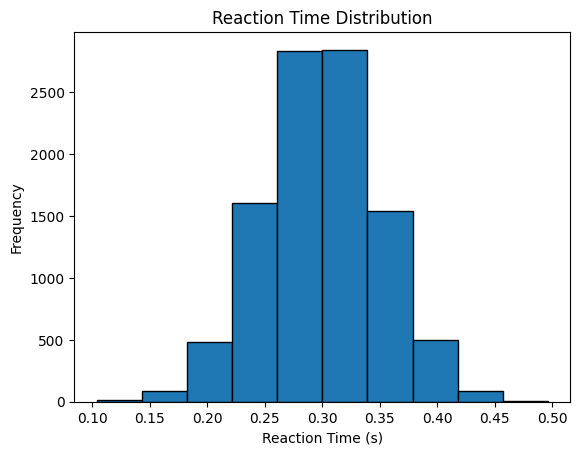

In [9]:
# Simulate reaction times for one participant
np.random.seed(42)  # set seed for reproducibility
sim = ReactionTimeSimulator(n_trials=10000)

# Compute the average reaction time
avg_time = sim.average_time()
print(f"Average reaction time: {avg_time:.3f} seconds")

# Plot the distribution of reaction times
sim.plot_histogram()


## Small challenge, change the class so that if you want, you can define the average of the distribution, standard deviation and number of bins

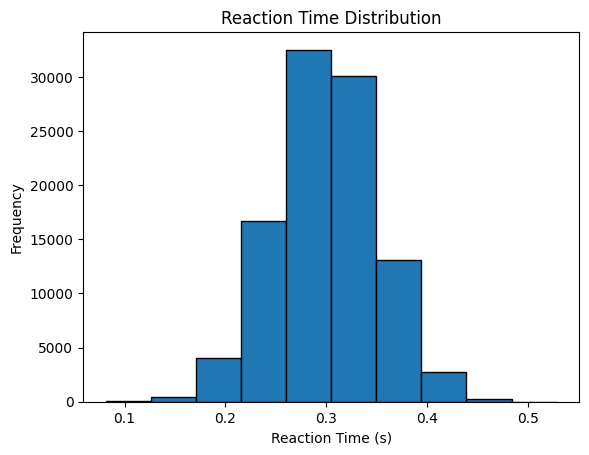

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class ReactionTimeSimulator:
    def __init__(self, n_trials=100, mean=0.3, std=0.05, bins=10):
        """
        Simulate reaction times for a number of trials (e.g., experiments).
        
        Parameters:
            n_trials (int): Number of trials to simulate (default 100)
            mean (float): Mean reaction time in seconds (default 0.3)
            std (float): Standard deviation of reaction time in seconds (default 0.05)
            bins (int): Number of bins to use in the histogram (default 10)
        """
        self.n_trials = n_trials
        self.mean = mean
        self.std = std
        self.bins = bins
        
        # Generate reaction times using a normal distribution with the specified mean and std,
        # clipping to avoid negative times.
        self.times = np.clip(np.random.normal(loc=self.mean, scale=self.std, size=n_trials),
                             a_min=0.0, a_max=None)
    
    def average_time(self):
        """Return the average reaction time across trials."""
        return float(np.mean(self.times))
    
    def plot_histogram(self):
        """Plot a histogram of the reaction times using the specified number of bins."""
        plt.hist(self.times, bins=self.bins, edgecolor='black')
        plt.title("Reaction Time Distribution")
        plt.xlabel("Reaction Time (s)")
        plt.ylabel("Frequency")
        plt.show()


sim = ReactionTimeSimulator(n_trials=100000)
sim.plot_histogram()



## Subclasses and Inheritance

Inheritance allows you to create a new class (a subclass) that inherits attributes and methods from an existing class (the parent class), then extend or override functionality as needed.

For example:
- **Base Class:** `Experiment` with a generic `run()` method.
- **Subclasses:** `EEGExperiment` and `MRIExperiment` that override `run()` to provide specific implementations.

Inheritance promotes code reuse. You can extend, for instance, a `ReactionTimeSimulator` class to create a `SlowReactionTimeSimulator` that slightly changes the simulation parameters (like adding a delay). 

This demonstrates the “is-a” relationship: a `SlowReactionTimeSimulator` is a type of `ReactionTimeSimulator`.


In [10]:
# Base class
class Experiment:
    def run(self):
        print("Running a generic experiment...")

# Subclass inheriting from Experiment
class EEGExperiment(Experiment):
    def run(self):
        print("Collecting EEG data for the experiment...")

class MRIExperiment(Experiment):
    def run(self):
        print("Collecting MRI scan data for the experiment...")


In [11]:
# Using the subclasses
exp1 = EEGExperiment()
exp2 = MRIExperiment()
exp1.run()   # calls the overridden method in EEGExperiment
exp2.run()   # calls the overridden method in MRIExperiment

# We can treat them as their base class
experiments = [exp1, exp2]
for exp in experiments:
    exp.run()  # each will run its own version of the method


## Challenge 1: Protein Sequence Class

**Problem:**
- Create a class `ProteinSequence` that:
  - Initializes with a name and a protein sequence string (using one-letter codes for amino acids).
  - Provides a method `length()` to return the total number of amino acids.
  - Provides a method `frequency()` (or `composition()`) that returns a dictionary of amino acid frequencies in the sequence.

**Tasks:**
1. Implement the `ProteinSequence` class based on the specifications.
2. Create an instance with a sample protein sequence.
3. Use the `length()` and `frequency()` methods to print and verify the results.

*Hint:* Consider using Python’s `collections.Counter` to count the frequency of amino acids.

Example usage prompt:
```
prot = ProteinSequence(name="ExampleProtein", sequence=protein_seq)

print("Name:", prot.name)
print("Sequence:", prot.sequence)
print("Length:", prot.length())
print("Amino acid frequencies:", prot.frequency())


In [12]:
from collections import Counter

class ProteinSequence:
    def __init__(self, name, sequence):
        """Initialize with protein name and sequence string."""
        self.name = name
        self.sequence = sequence.upper()  # store as uppercase for consistency
    
    def length(self):
        """Return the length of the protein sequence."""
        return len(self.sequence)
    
    def frequency(self):
        """Return a dictionary of amino acid frequencies (counts) in the sequence."""
        # We can use collections.Counter for brevity, which counts each character in the string
        freq_dict = Counter(self.sequence)
        return dict(freq_dict)  # convert Counter object to a regular dictionary


In [15]:
# Example protein sequence (random short sequence for demonstration)
protein_seq = "MIVLGHFFWG"  # 10 amino acids (M, I, V, L, G, H, F, F, W, G)
prot = ProteinSequence(name="ExampleProtein", sequence=protein_seq)

print("Name:", prot.name)
print("Sequence:", prot.sequence)
print("Length:", prot.length())
print("Amino acid frequencies:", prot.frequency())


Name: ExampleProtein
Sequence: MIVLGHFFWG
Length: 10
Amino acid frequencies: {'M': 1, 'I': 1, 'V': 1, 'L': 1, 'G': 2, 'H': 1, 'F': 2, 'W': 1}


In [16]:
import pandas as pd
freq = prot.frequency()
freq_series = pd.Series(freq)
print("Frequency table:")
print(freq_series)


Frequency table:
M    1
I    1
V    1
L    1
G    2
H    1
F    2
W    1
dtype: int64


## Challenge 2: Inheritance – Very Slow Reaction Time Simulator

**Problem:**
- Create a subclass `SlowReactionTimeSimulator` of `ReactionTimeSimulator` that simulates a scenario where reaction times are significantly slower (e.g., a mean of 0.6 seconds instead of 0.3 seconds).

**Tasks:**
1. Implement `SlowReactionTimeSimulator` by overriding the simulation process (for instance, by setting a higher mean in the random number generation).
2. Instantiate both a regular `ReactionTimeSimulator` and your `SlowReactionTimeSimulator` with the same number of trials (e.g., 100) and compare their average reaction times by printing the results.
3. *(Optional)* Plot histograms for both to visualize the difference in reaction time distributions.

*Hint:* How to pass all arguments without having to redefine them?

In [17]:
class VerySlowReactionTimeSimulator(ReactionTimeSimulator):
    def __init__(self, delay=0.0, *args, **kwargs):
        # Call the parent constructor with whatever additional arguments are provided.
        super().__init__(*args, **kwargs)
        # Modify the reaction times based on the additional delay.
        self.times = self.times + delay

In [20]:
# Set seed for reproducibility
np.random.seed(101)
normal_sim = ReactionTimeSimulator(n_trials=10000,mean=0.3,std=0.05,bins=100)
np.random.seed(101)
slow_sim = VerySlowReactionTimeSimulator(n_trials=10000,delay=0.5)

print(f"Normal simulator average: {normal_sim.average_time():.3f} s")
print(f"Very slow simulator average: {slow_sim.average_time():.3f} s")


Normal simulator average: 0.301 s
Very slow simulator average: 0.801 s


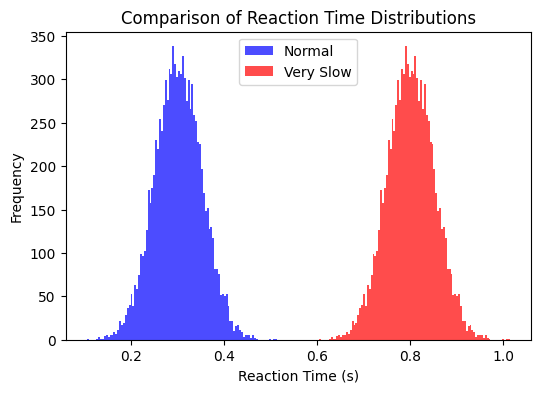

In [21]:
# Plotting both histograms to compare (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(normal_sim.times, bins=100, alpha=0.7, label="Normal", color='blue')
plt.hist(slow_sim.times, bins=100, alpha=0.7, label="Very Slow", color='red')
plt.xlabel("Reaction Time (s)")
plt.ylabel("Frequency")
plt.title("Comparison of Reaction Time Distributions")
plt.legend()
plt.show()


# Explanation: `*args` and `**kwargs` in Python

When defining functions in Python, `*args` and `**kwargs` allow you to accept an arbitrary number of extra arguments: *args collects any additional positional arguments into a tuple, while **kwargs collects any extra keyword arguments into a dictionary. This flexibility lets you write functions that can handle varying inputs without having to explicitly list every parameter.

## `*args` (Variable-length Positional Arguments)

- **Purpose:**  
  `*args` is used to collect extra positional arguments passed to a function into a tuple.

- **How It Works:**  
  When you prefix a parameter with an asterisk (`*`), any additional positional arguments passed to the function are bundled into a tuple.

- **Example:**

  ```python
  def my_function(*args):
      for arg in args:
          print(arg)

  my_function(1, 2, 3)
  # Output:
  # 1
  # 2
  # 3


## `kwargs` (Variable-length Keyword Arguments)

  **Purpose:**
  **kwargs allows you to capture extra keyword arguments (arguments passed by name) in a function call into a dictionary.

  How It Works:
  When you prefix a parameter with two asterisks (**), any additional keyword arguments passed to the function are bundled into a dictionary where the keys are the argument names and the values are the argument values.

  ```python
  def my_function(**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")

my_function(a=1, b=2, c=3)
# Output:
# a: 1
# b: 2
# c: 3
